# Analysing Topical Shifts in Migration Publication via Title Words

The titles of publications on migration management give us an overview of what the scientific community focused in their research over the decades.

The dataset consists of authors, titles and publication year of articles published in the journal International Migration (IM) over the period 1961-2011. 



## Loading and inspecting the dataset

We start by loading the dataset in Pandas, which allows us to do basic analysis of the metadata.

In [2]:
import pandas as pd



In [3]:
# the name and location of the article records for the IM journal (in CSV format)
records_file = '../data/wiley-crawl-records.json'

# load the csv data into a data frame
df = pd.read_json(records_file)
# show the first and last records of the dataset to demonstrate what the records look like
df

,article_title,article_doi,article_author,article_page_range,article_pub_date,article_pub_year,journal,volume,issue,issue_title,issue_page_range,issue_pub_date,issue_pub_year
0,Community Services and Out-Migration,https://onlinelibrary.wiley.com/doi/10.1111/j....,Douglas S. Massey & Nathalie Williams & Willia...,1-41,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
1,Europe's Migration Agreements with Migrant-Sen...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Aderanti Adepoju & Femke Van Noorloos & Anneli...,42-75,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
2,International Migration and Development in Asi...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Maruja M.B. Asis & Nicola Piper & Parvati Ragh...,76-106,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
3,Theoretical Considerations and Empirical Evide...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Nicholas P. Glytsos,107-130,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
4,"Causes, Challenges and Prospects of Brain Drai...",https://onlinelibrary.wiley.com/doi/10.1111/j....,Mussie Tessema,131-157,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,ECONOMIC AND SOCIAL REPERCUSSIONS OF SPANISH E...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Luis A. Martinez Cachero,35-48,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962
1686,HOW MIGRATION AFFECTS THE COUNTRY OF IMMIGRATION,https://onlinelibrary.wiley.com/doi/10.1111/j....,Francesco M. Dominedo,49-60,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962
1687,Information,https://onlinelibrary.wiley.com/doi/10.1111/j....,None,61-80,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962
1688,DOCUMENTATION,https://onlinelibrary.wiley.com/doi/10.1111/j....,None,81-90,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962


### Basic summary statistics

A count of the values in the journal name column, reveals that the metadata of articles has some variation, but almost all use the canonical _International Migration_. In the early years, the journal was called _Migration_ but also _Migracion_ was used. Some contributed articles are written in Spanish or French.



In [4]:
df.journal.value_counts()

International Migration    1629
Migracion                    34
Migration                    27
Name: journal, dtype: int64

#### Publication Years

Counting the number of articles per year reveals that some years had very few articles (e.g. 1979 has only 5), but most years have more than 10. The number of articles per year seems to increase over time. 

<AxesSubplot:xlabel='Issue year', ylabel='Number of articles'>

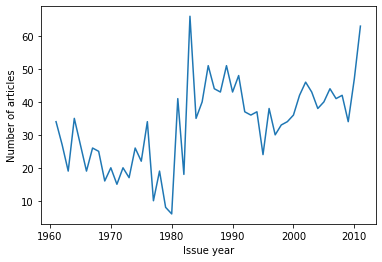

In [8]:
df.issue_pub_year.value_counts().sort_index().plot(xlabel='Issue year', ylabel='Number of articles')

There are a few years with very low numbers of articles, namely the years 1977, 1979, 1980. Listing the articles of those years reveals that each year had only one or two short issues. This could be a signal that there is a mistake in the data extraction process, or that these were just unusual years.

In [49]:
df[df.issue_pub_year.isin([1977, 1979, 1980])].sort_values(by='issue_pub_year')

,article_title,article_doi,article_author,article_page_range,article_pub_date,article_pub_year,journal,volume,issue,issue_title,issue_page_range,issue_pub_date,issue_pub_year,article_lang,lowercase_title,title_count,recurring_title
675,Human Rights and the Brain Drain,https://onlinelibrary.wiley.com/doi/10.1111/j....,N.K. ONUOHA CHUKUNTA,281-287,01 October 1977,1977,International Migration,15,4,"International Migration: Vol 15, No 4",281-318,October 1977,1977,en,human rights and the brain drain,1,False
1319,Circular Migration in Venezuelan Frontier Areas,https://onlinelibrary.wiley.com/doi/10.1111/j....,MARY ELLEN CONAWAY,35-42,01 January 1977,1977,International Migration,15,1,"International Migration: Vol 15, No 1",3-50,January 1977,1977,it,circular migration in venezuelan frontier areas,1,False
1318,Australia's Immigration Programme: an Evaluati...,https://onlinelibrary.wiley.com/doi/10.1111/j....,MICHAEL T. SKULLEY,21-34,01 January 1977,1977,International Migration,15,1,"International Migration: Vol 15, No 1",3-50,January 1977,1977,en,australia's immigration programme: an evaluati...,1,False
1317,Brain drain Issue and Indicators on Brain-Drain,https://onlinelibrary.wiley.com/doi/10.1111/j....,AMALENDU GUHA,3-20,01 January 1977,1977,International Migration,15,1,"International Migration: Vol 15, No 1",3-50,January 1977,1977,en,brain drain issue and indicators on brain-drain,1,False
1320,Information,https://onlinelibrary.wiley.com/doi/10.1111/j....,None,43,01 January 1977,1977,International Migration,15,1,"International Migration: Vol 15, No 1",3-50,January 1977,1977,en,information,30,True
1321,"Books, Periodicals, Pamphlets, Statistics",https://onlinelibrary.wiley.com/doi/10.1111/j....,G. BEYER,44-50,01 January 1977,1977,International Migration,15,1,"International Migration: Vol 15, No 1",3-50,January 1977,1977,en,"books, periodicals, pamphlets, statistics",45,True
676,Immigrants in Transition: The Israeli Absorpti...,https://onlinelibrary.wiley.com/doi/10.1111/j....,RUTH TAMAR HOROWITZ,288-299,01 October 1977,1977,International Migration,15,4,"International Migration: Vol 15, No 4",281-318,October 1977,1977,en,immigrants in transition: the israeli absorpti...,1,False
677,Some Current Topics of Labour Migration in Eur...,https://onlinelibrary.wiley.com/doi/10.1111/j....,HEINZ WERNER,300-307,01 October 1977,1977,International Migration,15,4,"International Migration: Vol 15, No 4",281-318,October 1977,1977,en,some current topics of labour migration in eur...,1,False
678,Information,https://onlinelibrary.wiley.com/doi/10.1111/j....,None,308-309,01 October 1977,1977,International Migration,15,4,"International Migration: Vol 15, No 4",281-318,October 1977,1977,en,information,30,True
679,"Books, Periodicals, Pamphlets, Statistics",https://onlinelibrary.wiley.com/doi/10.1111/j....,None,310-318,01 October 1977,1977,International Migration,15,4,"International Migration: Vol 15, No 4",281-318,October 1977,1977,en,"books, periodicals, pamphlets, statistics",45,True


Checking the issues for these years on the journal website reveals that these are the only issues available, so there is no mistakes in the extraction process. The fact that only issues 1 and 4 for 1977 are present does suggest that Wiley is missing two issues.

In some years, there are a high number of articles because each original article is published in three languages (English, French and Spanish), for instance Issue 2 in Volume 21 (from 1983). See [https://onlinelibrary.wiley.com/toc/14682435/1983/21/2](https://onlinelibrary.wiley.com/toc/14682435/1983/21/2).

In [9]:
counts = df.issue_pub_year.value_counts()
counts[counts > 50]

1983    66
2011    63
1989    51
1986    51
Name: issue_pub_year, dtype: int64

In [46]:
df[(df.issue_pub_year == 1983) & (df.article_author.isna())][['article_author', 'article_title']]

,article_author,article_title
187,None,"Books, Periodicals, Pamphlets, Statistics"
1199,None,Book Reviews
1200,None,"Books, Periodicals, Pamphlets, Statistics"
1201,None,INTERGOVERNMENTAL COMMITTEE FOR MIGRATION COMI...
1391,None,Addendum
1392,None,"Books, Periodicals, Pamphlets, Statistics"
1532,None,Bibliography on Undocumented Migrants or Migra...
1533,None,Introduction
1534,None,Introduction
1535,None,Introduction


#### Article Titles

Because titles can have variation in the use of uppercase and lowercase, we conduct this analysis on a normalised version of the titles where all characters are transformed to lowercase.



In [26]:
df['lowercase_title'] = df.article_title.str.lower()
title_counts = df.lowercase_title.value_counts()

title_counts

book reviews                                                                                                                                            46
books, periodicals, pamphlets, statistics                                                                                                               45
note from the editor                                                                                                                                    36
introduction                                                                                                                                            33
information                                                                                                                                             30
                                                                                                                                                        ..
social and medical problems of elderly migrants                       

There are a lot of recurring titles that carry little topical content regarding the discourse on migration. For instance, many issues have an article called 'Introduction' or 'Foreword', which are titles that do not convey any information about what the discourse was about. 

The list of titles that occur more than once contains mostly titles that can be safely removed from the list, although some titles that occur twice should be kept.

In [198]:
title_counts[title_counts > 1]

book reviews                                                                                                                                46
books, periodicals, pamphlets, statistics                                                                                                   45
note from the editor                                                                                                                        36
introduction                                                                                                                                33
information                                                                                                                                 30
recent publications                                                                                                                         20
publications, periodicals, pamphlets, statistics                                                                                            16

Titles the occur more than twice are all labeled as `recurring_title`.

In [199]:
# List all article titles that occur more than twice
list(title_counts[title_counts > 2].index)

['book reviews',
 'books, periodicals, pamphlets, statistics',
 'note from the editor',
 'introduction',
 'information',
 'recent publications',
 'publications, periodicals, pamphlets, statistics',
 'editorial',
 'books received',
 'intergovernmental committee for migration comite intergouvernemental pour les migrations comite intergubernamental para las migraciones',
 'list of reviewers',
 'current trends and developments',
 'bibliography',
 'documentation',
 'index',
 'publications received',
 'international organization for migration',
 'participants']

In [47]:
df['title_count'] = df.groupby(['lowercase_title'])['article_title'].transform('count')
df['recurring_title'] = df.title_count > 2
df[['recurring_title', 'article_title']]
                                           

,recurring_title,article_title
0,False,Community Services and Out-Migration
1,False,Europe's Migration Agreements with Migrant-Sen...
2,False,International Migration and Development in Asi...
3,False,Theoretical Considerations and Empirical Evide...
4,False,"Causes, Challenges and Prospects of Brain Drai..."
...,...,...
1685,False,ECONOMIC AND SOCIAL REPERCUSSIONS OF SPANISH E...
1686,False,HOW MIGRATION AFFECTS THE COUNTRY OF IMMIGRATION
1687,True,Information
1688,True,DOCUMENTATION


In [73]:
df.recurring_title.value_counts()

False    1401
True      289
Name: recurring_title, dtype: int64

There are 289 out of 1690 articles with recurring titles, leaving 1401 titles for analysis.

#### Authors

There are many different authors in the dataset. A value count reveals that some authors published multiple articles in IM, but the majority published only a single article. 

This should also be a warning that some values in the record may be **incorrect**, **incomplete** and/or **inconsistent**, so quantitative analysis should always be complemented with qualitative analysis.

In [74]:
counts = df.article_author.value_counts()
counts[counts > 3]

Reginald Appleyard                         11
Aderanti Adepoju                            8
W. Dumon Editor                             8
Wilfried Dumon Editor                       7
Elzbieta M. Gozdziak & Charles B. Keely     6
G. BEYER                                    6
G. Beyer                                    5
Wilfried Dumon                              4
Robyn Iredale                               4
Nicholas P. Glytsos                         4
Susan Martin                                4
Charles B. Keely                            4
Name: article_author, dtype: int64

These author names need normalisation to collapse variants like `BEYER, G.` and `Beyer, G.`.

In [6]:
df.article_author.str.lower().str.title().value_counts()

G. Beyer                                          11
Reginald Appleyard                                11
W. Dumon Editor                                    8
Aderanti Adepoju                                   8
Wilfried Dumon Editor                              7
                                                  ..
E. Pérez Botija                                    1
Sebnem Koser Akcapar                               1
R. D. Sharma & M. Michalowski & R. B. P. Verma     1
A.P. Lobo & J.J. Salvo                             1
                                                   1
Name: article_author, Length: 1058, dtype: int64

This reduces the number of distinct values from 1095 to 1058, so the impact is small, although Gunther Beyer is now among the most frequent author in the dataset.

In [7]:
df.article_author.str.lower().str.title().value_counts().value_counts()

1     952
2      73
3      17
4       6
6       4
11      2
8       2
7       1
5       1
Name: article_author, dtype: int64

There are 952 author names that appear only once, and only a handful authored 4 or more articles. 

There are also many articles with no specified author. It seems that many of these articles are often more about the issue and the articles ('bibliography', 'index') or about the research community ('experts', 'participants') than about migration management. 



In [75]:
df[df.article_author.isna()].recurring_title.value_counts()

True     226
False    217
Name: recurring_title, dtype: int64

More than half of the articles with no specified author has a recurring title. Of the remaining 217 articles, many refer to the community. 

In [78]:
df[(df.article_author.isna()) & (df.recurring_title == False)][['article_title']]

,article_title
9,"Public Law 89–236 89th congress, H. R. 2580 Oc..."
10,Scope for Latin America: ICEM'S CONTRIBUTION T...
11,UN PROJET D'AVENIR POUR L'AMÉRIQUE LATINE
12,AMéRICA LATINA
16,ICEM Language Training for Migrants: KNOWING T...
...,...
1634,Conference on Policy and Research on Migration...
1636,Note of the Editor
1637,Selected publication concerning the integratio...
1651,Migration in the International Press


There are especially many of these non-recurring titles with no author in the years with high numbers of articles, so it seems these are mostly articles that have been published in the three different languages, each time as a separate publication (for instance, [the double issue in 1981](https://onlinelibrary.wiley.com/toc/14682435/1981/19/1%E2%80%902)).


In [79]:

df[(df.article_author.isna()) & (df.recurring_title == False)].issue_pub_year.value_counts()


1983    27
1981    25
1986    15
1976    13
1964    11
1974    11
1965     8
1962     7
1969     7
1961     6
1989     6
1967     6
1992     6
1991     6
1987     5
1979     5
1968     5
1972     4
1966     4
1963     4
1970     4
1994     3
1999     3
1975     3
1982     3
1985     2
1993     2
1998     2
2006     2
2010     1
1988     1
1973     1
1990     1
1971     1
1995     1
1997     1
2002     1
2003     1
2004     1
2008     1
2011     1
Name: issue_pub_year, dtype: int64

For topical analysis, we argue that these can be left out without significantly influencing the outcome and interpretation. Even though some of these articles do seem to have a topical title, they are small in number, and spread across the years so have no distorting effect.

## Data Selection

Before performing a content analysis of the article titles, we want to make a selection of titles that is focused on the academic debate around migration, without any distracting non-topical titles that might obscure any topical shifts across the decades from 1960-1990.

Given the analysis above, we use the following two selection criteria for articles:

1. articles must have a title that does not occur more than twice.
2. articles must have a specified author


In [44]:
df_selected = df[(df.recurring_title == False) & (df.article_author.str.len() > 0)]
df_selected

,article_title,article_doi,article_author,article_page_range,article_pub_date,article_pub_year,journal,volume,issue,issue_title,issue_page_range,issue_pub_date,issue_pub_year,article_lang,lowercase_title,title_count,recurring_title
0,Community Services and Out-Migration,https://onlinelibrary.wiley.com/doi/10.1111/j....,Douglas S. Massey & Nathalie Williams & Willia...,1-41,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,en,community services and out-migration,1,False
1,Europe's Migration Agreements with Migrant-Sen...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Aderanti Adepoju & Femke Van Noorloos & Anneli...,42-75,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,en,europe's migration agreements with migrant-sen...,1,False
2,International Migration and Development in Asi...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Maruja M.B. Asis & Nicola Piper & Parvati Ragh...,76-106,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,en,international migration and development in asi...,1,False
3,Theoretical Considerations and Empirical Evide...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Nicholas P. Glytsos,107-130,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,en,theoretical considerations and empirical evide...,1,False
4,"Causes, Challenges and Prospects of Brain Drai...",https://onlinelibrary.wiley.com/doi/10.1111/j....,Mussie Tessema,131-157,26 April 2010,2010,International Migration,48,3,"International Migration: Vol 48, No 3",1-193,June 2010,2010,en,"causes, challenges and prospects of brain drai...",1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Peopling Skilled International Migration: Indi...,https://onlinelibrary.wiley.com/doi/10.1111/14...,Vaughan Robinson & Malcolm Carey,89-108,16 December 2002,2002,International Migration,38,1,"International Migration: Vol 38, No 1",3-137,March 2000,2000,en,peopling skilled international migration: indi...,1,False
1679,Ecological Succession and Asian Immigrants in ...,https://onlinelibrary.wiley.com/doi/10.1111/14...,Xiaowei Zang,109-125,16 December 2002,2002,International Migration,38,1,"International Migration: Vol 38, No 1",3-137,March 2000,2000,it,ecological succession and asian immigrants in ...,1,False
1684,"OVERSEAS MIGRATION TO AND FROM AUSTRALIA, 1947...",https://onlinelibrary.wiley.com/doi/10.1111/j....,Charles A. Price M. A.;Ph.D.,21-34,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962,en,"overseas migration to and from australia, 1947...",1,False
1685,ECONOMIC AND SOCIAL REPERCUSSIONS OF SPANISH E...,https://onlinelibrary.wiley.com/doi/10.1111/j....,Luis A. Martinez Cachero,35-48,06 April 1962,1962,Migration,2,2,"Migration: Vol 2, No 2",3-92,April‐June 1962,1962,en,economic and social repercussions of spanish e...,1,False


This leaves 1183 out of 1690 article titles for analysis.

## Analysing the Article Titles

To analyse the topics of discourse, we use the article titles. To do a content analysis, some data transformations are needed:

- standardising the use of upper and lowercase characters,
- removing common stopwords, as they convey nothing about the topics discussed
- counting individual words and sequences of words as a quantitative signal for the attention to different topics.

We look specifically at:

- word unigram frequencies: how often individual words occur across titles
- word bigram frequencies: how often combinations of two words occur across titles.

To demonstrate the need for the transformations described above, we look at the first 20 titles.

In [50]:
# Get a list of all the titles
titles = list(df_selected.article_title)

# show the first 20 titles
titles[:20]



['Community Services and Out-Migration',
 "Europe's Migration Agreements with Migrant-Sending Countries in the Global South: A Critical Review",
 'International Migration and Development in Asia: Exploring Knowledge Frameworks',
 "Theoretical Considerations and Empirical Evidence on Brain Drain Grounding the Review of Albania's and Bulgaria's Experience 1",
 'Causes, Challenges and Prospects of Brain Drain: The Case of Eritrea',
 'A Desire to Return to the Country of Birth as a Function of Language Preference: An Empirical Study with Iranian Immigrants in the United States',
 'Religious Status and Drug-use Behaviour among Former Soviet Union Immigrants',
 '“Reconsidering the Study of International Migration: A Way Forward for Macrostructural Migration Research”',
 'The New U.S.A. Immigration Law',
 'Post-War Migration to Switzerland*',
 'The Decline in Religious Participation of Migrants',
 'The Repatriation of French Algerians 1962–1963',
 'The Migration Problem And The Encyclical “Ma

#### Inconsistent Case

The titles differ in their use of upper and lower case, so one step is to normalise all titles to be lower case. 

One consequence of this is that meaningful differences between a word with an initial uppercase that is part of a name (like _Migration_ in the organisation name _Internationl Committee for European Migration_) is merged with the regular noun _migration_. But in most cases this is not a problem, as they represent the same concept. Moreover, titles of journal article tend to use title casing of all words in the title, or at least all content-bearing words (i.e. non-stopwords). So it is difficult to make this distinction with algorithmic processing anyway.



In [52]:
# Get a list of all the titles
titles = list(df_selected.lowercase_title)

# show the first 20 titles
titles[:20]



['community services and out-migration',
 "europe's migration agreements with migrant-sending countries in the global south: a critical review",
 'international migration and development in asia: exploring knowledge frameworks',
 "theoretical considerations and empirical evidence on brain drain grounding the review of albania's and bulgaria's experience 1",
 'causes, challenges and prospects of brain drain: the case of eritrea',
 'a desire to return to the country of birth as a function of language preference: an empirical study with iranian immigrants in the united states',
 'religious status and drug-use behaviour among former soviet union immigrants',
 '“reconsidering the study of international migration: a way forward for macrostructural migration research”',
 'the new u.s.a. immigration law',
 'post-war migration to switzerland*',
 'the decline in religious participation of migrants',
 'the repatriation of french algerians 1962–1963',
 'the migration problem and the encyclical “ma

### Word Frequency Lists

We start with a quick look at individual word frequencies for the first 20 titles to get an insight in some easy that need preprossing.

In [53]:
from collections import Counter # import to count word frequencies


# count frequencies of individual words
uni_freq = Counter()

for title in titles[:20]:
    # .lower() transform all characters to lower case
    # .split(' ') splits the title into chunks wherever there is a whitespace
    terms = title.lower().split(' ')
    uni_freq.update(terms)

# Show the 25 most common words and their frequencies
for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')

the                              15
of                               13
migration                         9
and                               7
in                                6
a                                 5
to                                5
country                           3
study                             3
with                              2
countries                         2
review                            2
international                     2
development                       2
empirical                         2
brain                             2
as                                2
an                                2
immigrants                        2
religious                         2
for                               2
immigration                       2
best                              2
community                         1
services                          1


Our first attempt is to simply split the title on whitespaces, but that leaves punctuation as part of words, e.g. `“Mater`.

The next preprocessing step is removing punctuation from the titles.

In [54]:
from collections import Counter # import to count word frequencies
import re # import to remove punctuation

# count frequencies of individual words
uni_freq = Counter()

for title in titles[:20]:
    # replace punctuation with nothing (i.e. remove from the word)
    title = re.sub(r'[^A-Za-z0-9 -]', '', title)
    # transform characters to lowercase
    clean_title = title.lower()
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    uni_freq.update(terms)

for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')
    



the                              15
of                               13
migration                        10
and                               7
in                                6
a                                 5
to                                5
country                           3
study                             3
with                              2
countries                         2
review                            2
international                     2
development                       2
empirical                         2
brain                             2
drain                             2
as                                2
an                                2
immigrants                        2
religious                         2
for                               2
immigration                       2
best                              2
community                         1


#### Stopwords and Content Words

Now we notice that the most frequent words are stopwords. We can use a standard stopword list provided by [NLTK](http://www.nltk.org) to remove those from the frequency lists to focus on the content words.

In [55]:
from collections import Counter # import to count word frequencies
import re # import to remove punctuation
from nltk.corpus import stopwords # import to remove stopwords

stopwords_en = stopwords.words('english')
stopwords_fr = stopwords.words('french')
stopwords_sp = stopwords.words('spanish')
stopwords_all = stopwords_en + stopwords_fr + stopwords_sp

print('The first 10 English stopwords:', stopwords_en[:10])
print('The first 10 French stopwords:', stopwords_fr[:10])
print('The first 10 Spanish stopwords:', stopwords_sp[:10])
print('\nTotal number of distinct stopwords:', len(stopwords_all))

The first 10 English stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']
The first 10 French stopwords: ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']
The first 10 Spanish stopwords: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

Total number of distinct stopwords: 621


In [56]:
# count frequencies of individual words
uni_freq = Counter()

for title in titles[:20]:
    # replace punctuation with nothing (i.e. remove from the word)
    title = re.sub(r'[^A-Za-z0-9 -]', '', title)
    # transform characters to lowercase
    clean_title = title.lower()
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    # remove stopwords
    terms = [term for term in terms if term not in stopwords_all and term != '']
    uni_freq.update(terms)

for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')
    



migration                        10
country                           3
study                             3
countries                         2
review                            2
international                     2
development                       2
empirical                         2
brain                             2
drain                             2
immigrants                        2
religious                         2
immigration                       2
best                              2
community                         1
services                          1
out-migration                     1
europes                           1
agreements                        1
migrant-sending                   1
global                            1
south                             1
critical                          1
asia                              1
exploring                         1


Now we have a list of mostly content words. Note that the stopwords list contains English stopwords, so common stopwords in other languages are not filtered out. We assume these are not very common so will leave them in for now. 

Now we repeat the the frequency counting for all 1183 titles, instead of the first 20.

In [57]:
# count frequencies of individual words
uni_freq = Counter()

for title in titles:
    # replace punctuation with nothing (i.e. remove from the word)
    title = re.sub(r'[^A-Za-z0-9 -]', '', title)
    # transform characters to lowercase
    clean_title = title.lower()
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    # remove stopwords
    terms = [term for term in terms if term not in stopwords_all and term != '']
    uni_freq.update(terms)

for term, freq in uni_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')
    



migration                       363
immigrants                      110
migrants                         92
immigration                      86
international                    79
labour                           74
case                             70
migrant                          66
australia                        61
new                              60
social                           58
policy                           57
united                           56
immigrant                        55
refugees                         53
states                           51
workers                          51
countries                        50
emigration                       49
economic                         48
return                           47
study                            45
women                            44
among                            41
development                      40


#### Word Bigrams

Next, we look at combinations of two words. Individual words can have quite different meanings in different contexts. Two neighbouring words in a title tend to contextualise each other, so convey more meaning.

In [58]:
# count frequencies of individual words
bi_freq = Counter()

for title in titles:
    # First, transform characters to lowercase
    clean_title = re.sub(r'[^A-Za-z0-9 -]', '', title.lower())
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    # replace punctuation with nothing (i.e. remove from the word)
    terms = [re.sub(r'\W', '', term) for term in terms]
    # get all pairs of subsequent title words
    bigrams = list(zip(terms[:-1], terms[1:]))
    # remove all bigrams for which the first or second word is a stopword
    bigram_terms = [' '.join(bigram) for bigram in bigrams if bigram[0] not in stopwords_all and bigram[1] not in stopwords_all]
    # count the occurrence of each bigram
    bi_freq.update(bigram_terms)


for term, freq in bi_freq.most_common(25):
    print(f'{term: <30}{freq: >5}')
    



international migration          51
united states                    46
labour market                    21
labour migration                 20
case study                       19
migrant workers                  18
brain drain                      17
emigration dynamics              17
return migration                 15
immigration policy               13
developing countries             13
human trafficking                13
migrant women                    13
middle east                      10
new zealand                      10
former soviet                     9
foreign workers                   9
latin american                    9
soviet union                      8
hong kong                         8
among immigrants                  8
migration policy                  8
asylum seekers                    8
irregular migration               7
canadian immigration              7


Now, 'international migration' is the most common two-word combination, followed by 'United States', 'labour migration', 'brain drain' and 'case study'.

### Analysing Title Words Per Decade

The articles are published over a period of several decades, and there might be shifts in the discourse over time. A next step is to group uni-grams and bi-grams per decade, to visualise shifts.

The first step is to group the article titles per decade. We derive the decade from the year that the issue was published. 

In [66]:
df['issue_decade'] = df.issue_pub_year.apply(lambda x: int(x/10) * 10 if not pd.isnull(x) else x)
df[['issue_pub_year', 'issue_decade']]



,issue_pub_year,issue_decade
0,2010,2010
1,2010,2010
2,2010,2010
3,2010,2010
4,2010,2010
...,...,...
1685,1962,1960
1686,1962,1960
1687,1962,1960
1688,1962,1960


In [67]:
def make_title_unigram_term_list(title: str, stopwords):
    # First, transform characters to lowercase
    clean_title = title.lower()
    # split the transformed string on whitespace
    terms = clean_title.split(' ')
    # replace punctuation with nothing (i.e. remove from the word)
    terms = [re.sub(r'[^A-Za-z0-9 -]', '', term) for term in terms]
    # remove stopwords
    terms = [term for term in terms if term not in stopwords]
    return terms


def make_title_bigram_term_list(title: str, stopwords):
    # first turn the title into a list of normalised words
    terms = make_title_unigram_term_list(title, stopwords)
    # get all pairs of subsequent title words
    bigrams = list(zip(terms[:-1], terms[1:]))
    # remove all bigrams for which the first or second word is a stopword
    bigram_terms = [' '.join(bigram) for bigram in bigrams 
                    if bigram[0] not in stopwords and bigram[1] not in stopwords]
    return bigram_terms


def normalise_title(title: str):
    if not isinstance(title, str):
        return title
    terms = make_title_unigram_term_list(title, [])
    normalised_title = ' '.join(terms)
    return normalised_title


# Add the normalised title as extra column to the data frame
df['normalised_title'] = df.article_title.apply(normalise_title)

# Recreate the selection of the data with the new column
df_selected = df[(df.recurring_title == False) & (df.article_author.str.len() > 0)]

df_selected.normalised_title

0                    community services and out-migration
1       europes migration agreements with migrant-send...
2       international migration and development in asi...
3       theoretical considerations and empirical evide...
4       causes challenges and prospects of brain drain...
                              ...                        
1678    peopling skilled international migration india...
1679    ecological succession and asian immigrants in ...
1684    overseas migration to and from australia 19471961
1685    economic and social repercussions of spanish e...
1686     how migration affects the country of immigration
Name: normalised_title, Length: 1183, dtype: object

The number of articles per decade shows that there is a slight dip in the 1970s, but increase well over 300 articles per decade from 1980 onwards:

In [68]:
df.issue_decade.value_counts().sort_index()

1960    228
1970    191
1980    395
1990    360
2000    406
2010    110
Name: issue_decade, dtype: int64

In [69]:
decades = sorted([int(decade) for decade in list(set(df.issue_decade)) if not pd.isnull(decade)])
decades

[1960, 1970, 1980, 1990, 2000, 2010]

In [70]:


for decade in decades:
    titles = list(df_selected[df_selected.issue_decade == decade].normalised_title)
    unigram_terms = [term for title in titles for term in make_title_unigram_term_list(title, stopwords_all)]
    unigram_freq = Counter(unigram_terms)
    print(decade)
    print('--------------------------')
    for term, freq in unigram_freq.most_common(25):
        print(f'{term: <30}{freq: >5}')
    print('\n\n')
    



1960
--------------------------
migration                        29
immigration                      16
australia                        11
emigration                       10
immigrants                       10
australian                        8
development                       7
european                          7
social                            7
immigrant                         6
america                           6
assimilation                      6
international                     6
country                           5
europe                            5
integration                       5
refugees                          5
economic                          5
western                           5
migrants                          4
aspects                           4
study                             4
icem                              4
latin                             4
influence                         4



1970
--------------------------
migration                        

In [72]:
from nltk.corpus import stopwords


for decade in decades:
    titles = list(df_selected[df_selected.issue_decade == decade].normalised_title)
    bigram_terms = [term for title in titles for term in make_title_bigram_term_list(title, stopwords_all)]
    bigram_freq = Counter(bigram_terms)
    print(decade)
    print('--------------------------')
    for term, freq in bigram_freq.most_common(25):
        print(f'{term: <30}{freq: >5}')
    print('\n\n')
    



1960
--------------------------
latin america                     4
brain drain                       3
international migration           3
western australia                 3
migration affects                 2
affects country                   2
assimilation immigrant            2
immigrants australia              2
migration australia               2
immigrants returning              2
selective migration               2
rural settlement                  2
united states                     2
immigration development           2
economic social                   2
polish immigrants                 2
immigrants western                2
immigration policy                2
view icem                         2
new usa                           1
usa immigration                   1
immigration law                   1
post-war migration                1
migration switzerland             1
decline religious                 1



1970
--------------------------
united states                    